In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#from imblearn.over_sampling import ADASYN
from collections import Counter
#from keras.utils.data_utils import Sequence
#from imblearn.keras import balanced_batch_generator
import sys
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet152
from keras.utils import plot_model

In [2]:
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [2]:
x_validation = np.load('x_validation.npy')
y_validation = np.load('y_validation.npy')

x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [3]:
#x_test = (x_test).astype('float32')/255
#x_train = (x_train).astype('float32')/255
#x_validation = (x_validation).astype('float32')/255

In [3]:
print(x_train.shape)
print(x_train.dtype)

(6309, 180, 240, 3)
uint8


In [4]:
print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({5: 4220, 4: 690, 2: 689, 1: 321, 0: 212, 6: 97, 3: 80})


In [5]:
####### preprocessing, image augmentation ######

In [6]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

In [7]:
def augmente_class(c, class_members, datagen, num_sample):
    x_train_augmented = np.zeros((num_sample, class_members.shape[1],class_members.shape[2],class_members.shape[3]),
                                 dtype='uint8')
    y_train_augmented = np.full((num_sample,), c,
                                 dtype='uint8')

    
    filler = 0
    for img in datagen.flow(class_members, batch_size=1):
        x_train_augmented[filler] = img
        
        
        filler+=1
        if filler>=num_sample:
            break
    
    return x_train_augmented, y_train_augmented

In [16]:
%%time
for c in range(0,7):

    class_members = []
    for index in np.where(y_train == c)[0]:
        class_members.append(x_train[index])

    class_members = np.array(class_members)

    x_augmented, y_augmented = augmente_class(c, class_members, datagen, 1750)
    
    np.save("D:/sys800project/x_augmented"+ str(c) +".npy", x_augmented)
    np.save("D:/sys800project/y_augmented"+ str(c) +".npy", y_augmented)
    
    print(x_augmented.shape)
    print(y_augmented.shape)

(1750, 180, 240, 3)
(1750,)
(1750, 180, 240, 3)
(1750,)
(1750, 180, 240, 3)
(1750,)
(1750, 180, 240, 3)
(1750,)
(1750, 180, 240, 3)
(1750,)
(1750, 180, 240, 3)
(1750,)
(1750, 180, 240, 3)
(1750,)
Wall time: 3min 13s


In [ ]:
########### loading augmented data ###########

In [2]:
x_augmented = np.load("D:/sys800project/x_augmented"+ str(0) +".npy")
y_augmented = np.load("D:/sys800project/y_augmented"+ str(0) +".npy")

for c in range(1,7):
    x_augmented = np.concatenate((x_augmented, np.load("D:/sys800project/x_augmented"+ str(c) +".npy")), axis=0)
    y_augmented = np.concatenate((y_augmented, np.load("D:/sys800project/y_augmented"+ str(c) +".npy")), axis=0)
    

In [3]:
print(x_augmented.shape)
print(y_augmented.shape)
print('Augmented dataset shape %s' % Counter(y_augmented))
print(x_augmented.dtype)
print(x_augmented.nbytes)

(12250, 180, 240, 3)
(12250,)
Augmented dataset shape Counter({0: 1750, 1: 1750, 2: 1750, 3: 1750, 4: 1750, 5: 1750, 6: 1750})
uint8
1587600000


In [4]:
x_validation = np.load('x_validation.npy')
y_validation = np.load('y_validation.npy')

x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [5]:
print(x_validation.dtype)

uint8


In [6]:
mean = np.mean(x_augmented)


In [10]:
b = []
for i in np.arange(0,22222, 22222//250):
    b.append(x_augmented[i])
std = (np.std(np.array(b)))

In [7]:
x_augmented = (x_augmented).astype('float32')/255
x_test = (x_test).astype('float32')/255
x_validation = (x_validation).astype('float32')/255

In [ ]:
#x_augmented = (x_augmented - mean)/std
#x_test = (x_test - mean)/std
#x_validation = (x_augmented - mean)/std

In [21]:
np.save("D:/sys800project/x_augmentedFloat.npy", x_augmented)
np.save("D:/sys800project/y_augmentedFloat.npy", y_augmented)

np.save("D:/sys800project/x_validationFloat.npy", x_validation)
np.save("D:/sys800project/y_validationFloat.npy", y_validation)

np.save("D:/sys800project/x_testFloat.npy", x_test)
np.save("D:/sys800project/y_testFloat.npy", y_test)

In [ ]:
########### loading augmented data (for real this time) ###########

In [11]:
x_augmented = np.load("D:/sys800project/x_augmentedFloat.npy")
y_augmented = np.load("D:/sys800project/y_augmentedFloat.npy")

x_validation = np.load("D:/sys800project/x_validationFloat.npy")
y_validation = np.load("D:/sys800project/y_validationFloat.npy")

x_test = np.load("D:/sys800project/x_testFloat.npy")
y_test = np.load("D:/sys800project/y_testFloat.npy")

In [12]:
print(x_augmented.shape)
print(x_validation.shape)
print(x_test.shape)
print(x_augmented.dtype, x_validation.dtype, x_test.dtype )

(12250, 180, 240, 3)
(701, 180, 240, 3)
(3005, 180, 240, 3)
float32 float32 float32


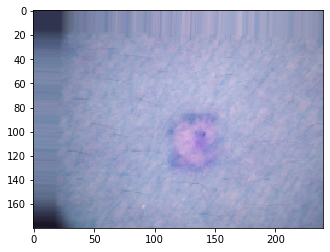

In [22]:
plt.imshow(x_augmented[2005])

In [3]:
##### CNN model creation

In [2]:
resnet152 = ResNet152(include_top=False, weights='imagenet', input_shape=(180,240,3))

In [3]:
model = Sequential([
  resnet152
])


In [4]:
model.add(GlobalAveragePooling2D()) # test avec flatten?
model.add(Dropout(0.2))

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))

#model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.2))

model.add(Dense(7, activation = 'softmax'))
#model.add(Activation('softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Model)            (None, 6, 8, 2048)        58370944  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 3591      
Total params: 59,423,623
Trainable params: 59,272,199
Non-trainable params: 151,424
______________________________________

In [8]:
model.load_weights('resnet152_augmented')

In [8]:
########################## Common part: optimization and training#############################################

In [7]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [8]:
model.compile(optimizer= optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.000001)

In [10]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
#datagen.fit(x_augmented)

In [14]:
epochs = 40
batch_size = 10
history = model.fit_generator(
    datagen.flow(x_augmented,y_augmented, batch_size=batch_size),
    steps_per_epoch=x_augmented.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_validation,y_validation),
    validation_steps=x_validation.shape[0] // batch_size,
    callbacks=[learning_rate_reduction]
)

Epoch 1/40
1225/1225 [==============================] - 1602s 1s/step - loss: 1.6376 - accuracy: 0.3588 - val_loss: 1.8080 - val_accuracy: 0.3181
Epoch 2/40
1225/1225 [==============================] - 1596s 1s/step - loss: 1.3684 - accuracy: 0.4713 - val_loss: 1.3232 - val_accuracy: 0.4479
Epoch 3/40
1225/1225 [==============================] - 1555s 1s/step - loss: 1.2583 - accuracy: 0.5264 - val_loss: 2.2227 - val_accuracy: 0.3452
Epoch 4/40
1225/1225 [==============================] - 1553s 1s/step - loss: 1.1686 - accuracy: 0.5558 - val_loss: 1.1344 - val_accuracy: 0.6034
Epoch 5/40
1225/1225 [==============================] - 1546s 1s/step - loss: 1.0627 - accuracy: 0.6010 - val_loss: 0.8212 - val_accuracy: 0.7161
Epoch 6/40
1225/1225 [==============================] - 1554s 1s/step - loss: 0.9818 - accuracy: 0.6307 - val_loss: 1.4480 - val_accuracy: 0.4593
Epoch 7/40
1225/1225 [==============================] - 1550s 1s/step - loss: 0.8913 - accuracy: 0.6642 - val_loss: 0.9684 -

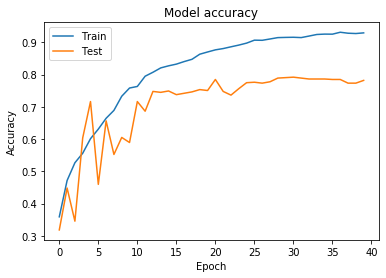

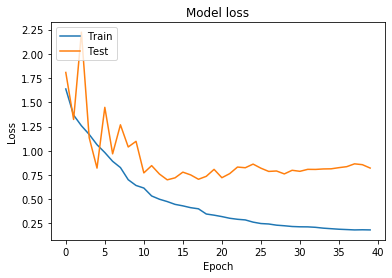

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
#### Saving the weights of the model for a later use.


model.save_weights('resnet152_augmented')

In [20]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 1)

3005/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [25]:
##### confusion matrix

pred = model.predict(x_test)
pred_label = np.zeros(len(y_test), dtype='uint8')

for i in range(len(pred)):
    pred_label[i] = int(np.argmax(pred[i]))
    

In [26]:
confusion = confusion_matrix(y_test, pred_label)

In [27]:
print(confusion)
print('predicted is horizontal, true label is vertical')

[[  56    7   16    2   10    1    0]
 [  16  110   15    3    4   10    1]
 [  18    9  237    3   50   23    0]
 [   2    1    0   21    0    3    0]
 [   5    2   66    0  199   62    2]
 [  21   23  149   11  210 1603    1]
 [   0    1    0    0    0    1   31]]
predicted is horizontal, true label is vertical
